
# Datenanalyse *Income Census Dataset 1994*

Mareike Klara van Elsacker 
Matrikelnummer: 3049132

## Inhaltverzeichnis 

1. [Einleitung](#einleitung)
2. [Datenexploration](#datenexploration)
3. [Bereinigung des Datensatzes und Datentransformation](#bereinigung-des-datensatzes-und-datentransformation)
4. [Datenmodellierung und Evaluierung](#Datenmodellierung-und-Evaluierung)
5. [Fazit](#fazit)
6. [Optimierung](#optimierung)

## 1. Einleitung 

Seit 1790 wird in den USA alle zehn Jahre eine sogenannte Volkszählung, die auch als Zensus bekannt ist, durchgeführt.Diese Zählung ist in Artikel 1, Abschnitt 2 der US-Verfassung vorgeschrieben. (Quelle) 
Die Zählung wird vom [United States Census Bureau](https://en.wikipedia.org/wiki/United_States_Census_Bureau) vorgenommen. Außerdem erhebt das US Census Bureau seit 1940 den [Current Population Survey - *CPS*](https://www.census.gov/programs-surveys/cps.html) für 
das [Bureau of Labor Statistics](https://www.bls.gov/). Bei der monatlichen Umfrage werden ca. 60.000 US-Haushalte befragt. Ziel der Datenerhebung ist es monatlich einen Bericht über die Beschäftigungslage und eine Schätzung der Arbeitslosenquote zu veröffentlichen. 
Der für die Datenanlyse genutzte [Datensatz](https://archive.ics.uci.edu/dataset/2/adult), der von der Machine Learning Group an der UCI gehostet wird, enthält Bevölkerungsdaten aus dem Jahr 1994 und besteht aus einem
Test- und Trainingsdatensatz. Diese werden oft als "Census Income Dataset" bezeichnet, da er auf demografischen und einkommensbezogenen
Informationen basiert. Die [Daten](https://www.kaggle.com/datasets/uciml/adult-census-income) dafür wurden 1994 von Barry Becker und Ronny Kohavi aus der Datenbank des Census Bureaus extrahiert.
Das *Census Income Dataset* wurde in über in über zwanzig Publikationen zitiert und im Bereich des maschinellen Lernens und der Datenanalyse verwendet. 
Trotz der Vielzahl an Zietierungen des Datensatzes konnte ich bei der Recherche nicht genau feststellen, ob die Daten aus den 1990 Censusdaten oder einer Zusammenführung der monatlichen
CPS-Daten von 1994 extrahiert wurden. Die Kategorie *fnlwgt*(Gewichtung) lässt darauf schließen, dass es sich um CPS-Daten handeln muss, da aufgrund der komplexen Stichprobenerhebung [Gewichte](https://www.census.gov/programs-surveys/cps/technical-documentation/methodology/weighting.html) verwendet werden müssen, um eine repräsentative Statistik zu erstellen. Aufgrund dieser Information gehe ich davon aus, dass es sich um die CPS-Daten von 1994 handelt. Allerdings ist nicht auf den spezifischen Monat zurückzuschließen.

Monatlich werden ca. 60.000 US-Haushalte durch ein mehrstufiges, statistischens Stichprobenverfahren, ausgewählt. Ein Haushalt wird vier aufeinander folgende Monate lang befragt,
dann acht Monate lang nicht befragt und danach vier Monate lang wieder in die Stichprobe aufgenommen. Ein erwachsenes Mitglied eines jeden Haushalts macht Angaben zu allen Haushaltsmitgliedern.
Die Haushalte werden sowohl telefonisch als auch persönlich befragt. Wichtig dabei ist zu beachten, dass alle Angaben Selbstzuschreibungen und Selbstidentifikationen sind. Gerade bei der Frage der ethnischen Identität, Geschlecht sollte das berücksichtigt werden. 

In der vorliegenden Datenanalyse soll vorrausgesagt werden, ob eine Person, die in den USA lebt, aufgrund der biografischen Informationen (z.B. Bildungsgrad, Gender, Berufsgruppe, Alter, etc.) ein jährliches Einkommen von über 50K$ erzielt oder nicht.
Konkret: Es wird vermutet, dass höheres Alter und ein fortgeschrittenerer Bildungsgrad positiv mit einem Einkommen von über 50.000 US-Dollar korrelieren, während das weibliche Geschlecht, Familienstand *notmarried* negative Einflüsse auf ein solches Einkommen haben könnten.


Mein großer Dank geht an StackOverFlow, die Dokumentation der einzelnen Bibliotheken und an das bereitgestellte Vorlesungsmaterial und Übungen von euch. Ich habe nicht an jeder einzelnen Stelle zitiert, wo ich auf StackOverflow, Dokumentation, etc. zurückgegriffen habe. 




### 1.2 Technische Anforderung 



                                                                                                                   
| Package                                                                        | Versionsnummer | Zweck                                                                                                                                                                                                          |
|:-------------------------------------------------------------------------------|:--------------:| :--                                                                                                                                                                                                            |
| [Pandas](https://pandas.pydata.org/docs/)                                      |     2.0.3      | Eine Pyhton-Bibliothek für die Datenmanipulation und -analyse                                                                                                                                                  |
| [Seaborn](https://seaborn.pydata.org/)                                         |     0.12.2     | Ein Package, das auf Matplotlib aufbaut und für die Datenvisualisierung entwickelt wurde                                                                                                                        |
| [NumPy](https://numpy.org/)                                                    |     1.25.2     | Python-Bibliothek, die ein mehrdimensionales Array-Objekt, verschiedene abgeleitete Objekte (z. B. maskierte Arrays und Matrizen) und eine Reihe von Routinen für schnelle Operationen auf Arrays bereitstellt |
| [Matplotlib](https://matplotlib.org/)                                          |     3.7.2      | Matplotlib ist eine umfassende Bibliothek zur Erstellung statischer, animierter und interaktiver Visualisierungen in Python                                                                                    |
| [Scipy](https://www.scipy.org/)                                                |     1.9.3      | Das SciPy-Ökosystem umfasst allgemeine und spezielle Tools für die Datenverwaltung und -berechnung, produktive Experimente und Hochleistungsberechnungen                                                       |
| [Sklearn](https://scikit-learn.org/stable/)                                    |     1.3.0      | Einfache und effiziente Tools für die prädiktive Datenanalyse    |                                                                                                                                                                                                                 
                                                                                                               |




In [1]:
#Import all Packages and Libraries 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

print('Sklearn:', sklearn.__version__)
print('Scipy:', scipy.__version__)
print('Matplotlib:', matplotlib.__version__)
print('NumPy:', np.__version__)
print('Seaborn:', sns.__version__)
print('Pandas:', pd.__version__)

# Import from 
import helpers

Sklearn: 1.3.1
Scipy: 1.9.3
Matplotlib: 3.8.0
NumPy: 1.25.2
Seaborn: 0.12.2
Pandas: 2.1.1


## 2. Datenexploration 

Für das Datenset gibt es ein Test- und ein Trainigsdatenset. Beide befinden sich in dem Ordner ./data/. 

Sowohl die Test- als auch die Traningsdaten haben jeweils folgende 15 Kategorien: 

| Kategorie      |               Beschreibung               | Werte                                                                                                                                                                                                          |
|:---------------|:----------------------------------------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| age            |       Das Alter eines Individuums        | Integer größer als 0                                                                                                                                                                                           |
| workclass      |               Berufsklasse               | Private, Self emp not inc, Self emp inc, Federal gov, Local gov, State gov, Without pay, Never worked|
| fnlwgt         |                 Gewicht                  | Integer größer als 0                                                                                                                                                                                           |
| education      |    Höchster Bildungsgrad einer Person    | Bachelors, Some-college, 11th, HS-grad Prof-school, Assoc-acdm, Assoc-voc, 9th, 7-8th, 12th Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool                                                              |
| education.num  | Höchter Bidlungsgrad in numerischer Form | Integer größer als 0                                                                                                                                                                                           |
| marital.status |              Familienstand               | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse (AF = Armed-Forces)                                                                                  |
| occupation     |                  Beruf                   | Tech support, Craft repair, Other service, Sales, Exec managerial, Prof specialty, Handlers cleaners, Machine op inspct, Adm clerical, Farming fishing, Transport moving, Priv house serv, Protective-serv, AF |
| relationship   |                Beziehung                 | Wife, Own child, Husband, Not in family, Other relative, Unmarried                                                                                                                                             |                                                                                                                
| race           |      Ethnische Selbstidentifikation      | White, Asian Pac Islander, Amer Indian Eskimo, Other, Black                                                                                                                                                    |                                                                                                                                                                                                        
| sex            |                Geschlecht                | Male, Female                                                                                                                                                                                                   |
| capital.gain   |             Vermögenszuwachs             | Integer größer als 0                                                                                                                                                                                           |                                                                                                                                                                                                          
| capital.loss   |             Vermögensverlust             | Integer größer als 0                                                                                                                                                                                           |                                                                                                                                                                                                          
| hours.per.week |         Arbeitsstunden pro Woche         | Integer größer als 0                                                                                                                                                                                           |
| native.country |              Herkunftsland               | 43 Länder                                                                                                                                                                                                      |                                                                                                                                                                                                                                                             
| income         |                Einkommen                 | <=50k, >50k                                                                                                                                                                                                    |




In [2]:
#Define the filepaths for the files 

from pathlib import Path

train_path = Path('../data/adult.data')
test_path = Path('../data/adult.test')

#Load the data into the Jupyter Notebook
#The csv files contain both a comma and a leading blank per field as separator, this must be explicitly removed via option

raw_adult_train_df = pd.read_csv(train_path, header=15, skipinitialspace=True)
raw_adult_test_df = pd.read_csv(test_path, header=15, skipinitialspace=True)

print("---- Informationen über Größe der Datensets -----")
print("Training Dataset: ", raw_adult_train_df.shape)
print("Test Dataset: ", raw_adult_test_df.shape)




---- Informationen über Größe der Datensets -----
Training Dataset:  (32545, 15)
Test Dataset:  (16266, 15)


Auf den ersten Blick haben die beiden Datensätze die gleiche Anzahl an Spalten. Der Trainingsdatensatz umfasst ca. 67% der Daten. Das ist eine realistische Aufteilung zwischen Trainings- und Testdaten. 

In [3]:
print("---- Informationen über die Spalten des Datensets -----")
print("Training Dataset Spalten: ", raw_adult_train_df.columns)
print("Test Dataset Spalten: ", raw_adult_test_df.columns)

---- Informationen über die Spalten des Datensets -----
Training Dataset Spalten:  Index(['34', 'Private', '245487', '7th-8th', '4', 'Married-civ-spouse',
       'Transport-moving', 'Husband', 'Amer-Indian-Eskimo', 'Male', '0', '0.1',
       '45', 'Mexico', '<=50K'],
      dtype='object')
Test Dataset Spalten:  Index(['48', 'Private', '279724', 'HS-grad', '9', 'Married-civ-spouse',
       'Machine-op-inspct', 'Husband', 'White', 'Male', '3103', '0', '48.1',
       'United-States', '>50K.'],
      dtype='object')


Sowohl das Test- als auch das Trainingsdatenset haben keine Spaltennamen. Es sieht so aus, dass die beiden Datensätze in ihren Spalten identisch sind. Die Spaltennamen werden nun hinzugefügt. 

In [4]:
#Add column names to both datasets 
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation',
                'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
                'income']

raw_adult_train_df.columns = column_names
raw_adult_test_df.columns = column_names

print("---- Spaltennamen -----")
print("Training Dataset Spaltennamen: ", raw_adult_train_df.columns)
print("Test Dataset Spaltennamen: ", raw_adult_test_df.columns)


---- Spaltennamen -----
Training Dataset Spaltennamen:  Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')
Test Dataset Spaltennamen:  Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')



Im Folgenden werde ich mir einen ersten Überblick über die Daten verschaffen. 


In [5]:
raw_adult_train_df.head(20)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
1,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
2,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
3,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
4,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
5,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,<=50K
6,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States,<=50K
7,43,Private,117037,11th,7,Married-civ-spouse,Transport-moving,Husband,White,Male,0,2042,40,United-States,<=50K
8,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,<=50K
9,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K


In [6]:
raw_adult_train_df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32535,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32536,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32537,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32538,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32539,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32540,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32541,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32542,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32543,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32544,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


Für den Trainingsdatensatz können folgende Beobachtungen gemacht werden: 

In [7]:
raw_adult_test_df.head(5)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,43,Private,346189,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K.
1,20,State-gov,444554,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,25,United-States,<=50K.
2,43,Private,128354,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,30,United-States,<=50K.
3,37,Private,60548,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K.
4,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,?,>50K.


Für den Trainingsdatensatz können ähnliche Beobachtungen, wie für den Testdatensatz gemacht werden. Die Anzahl der Spalten sind gleich wie im Testdatensatz. Allerdings fällt auf, dass es in Kategorien den Wert `?` gibt. Dieser Wert soll durch NaN-Werte ersetzt werden. Bei der Kategorie `income` ist zu sehen, dass beim Testdatensatz die Strings am Ende einen `.` haben. Bei der Erstsichtung des Trainingsdatensatzes ist dies nicht so. Auch darauf wird in Kapitel X noch einmal gesonert darauf eingegangen. 

Um die beiden Datensätze noch einmal genauer anzuschauen, werden im Folgenden die Funktionen `.info`, `isnull`, `.describe` und `.nunique` verwendet. 

In [8]:
raw_adult_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32545 entries, 0 to 32544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32545 non-null  int64 
 1   workclass       32545 non-null  object
 2   fnlwgt          32545 non-null  int64 
 3   education       32545 non-null  object
 4   education.num   32545 non-null  int64 
 5   marital.status  32545 non-null  object
 6   occupation      32545 non-null  object
 7   relationship    32545 non-null  object
 8   race            32545 non-null  object
 9   sex             32545 non-null  object
 10  capital.gain    32545 non-null  int64 
 11  capital.loss    32545 non-null  int64 
 12  hours.per.week  32545 non-null  int64 
 13  native.country  32545 non-null  object
 14  income          32545 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Von den 15 Kategorien sind sechs Kategorien numerisch als `int64(6)` und neun Kategorien als String bzw. Objekt vorhanden. Es scheint, dass es außerder Besonderheit mit den `?`keine weiteren fehlenden Werte gibt. Dies wollen wir nocheinmal mit `isnull` überprüfen. 

In [9]:
raw_adult_train_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Für den Trainingsdatensatz gibt es keine weiteren fehlenden Werte. 

In [10]:
raw_adult_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16266 non-null  int64 
 1   workclass       16266 non-null  object
 2   fnlwgt          16266 non-null  int64 
 3   education       16266 non-null  object
 4   education.num   16266 non-null  int64 
 5   marital.status  16266 non-null  object
 6   occupation      16266 non-null  object
 7   relationship    16266 non-null  object
 8   race            16266 non-null  object
 9   sex             16266 non-null  object
 10  capital.gain    16266 non-null  int64 
 11  capital.loss    16266 non-null  int64 
 12  hours.per.week  16266 non-null  int64 
 13  native.country  16266 non-null  object
 14  income          16266 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [11]:
raw_adult_test_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Für die Testdaten gilt das Gleiche wie für die Trainingsdaten. Auch hier scheint es keine weiteren fehlenden Werte zu geben. 

In [12]:
raw_adult_train_df.describe()


,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32545.000000,3.254500e+04,32545.000000,32545.000000,32545.000000,32545.000000
mean,38.581718,1.897818e+05,10.080320,1077.519988,87.346751,40.437394
std,13.642438,1.055608e+05,2.572391,7386.686610,403.054612,12.346420
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178160e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
raw_adult_test_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,16266.000000,1.626600e+04,16266.000000,16266.000000,16266.000000,16266.000000
mean,38.766876,1.894271e+05,10.073528,1081.654064,87.980327,40.395426
std,13.848324,1.057282e+05,2.567455,7587.054757,403.282278,12.481656
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167528e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778280e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


Beide Datensätze sind in ihren numerischen Kategorien sehr ähnlich bzw. fast gleich. Dies bestätigt noch einmal meine Idee, die Trainings- und Testdaten zusammenzfügen und sie dann später für das Modell wieder random teilen zu lassen.  

In [14]:
print("Trainingsdatenset: Anzahl der Unique-Werten: \n", raw_adult_train_df.nunique())


Trainingsdatenset: Anzahl der Unique-Werten: 
 age                  73
workclass             9
fnlwgt            21640
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       42
income                2
dtype: int64


In [15]:
print("Testdatenset: Anzahl der Unique-Werten: \n", raw_adult_test_df.nunique())

Testdatenset: Anzahl der Unique-Werten: 
 age                  73
workclass             9
fnlwgt            12778
education            16
education.num        16
marital.status        7
occupation           15
relationship          6
race                  5
sex                   2
capital.gain        113
capital.loss         82
hours.per.week       89
native.country       41
income                2
dtype: int64


Folgendes kann bei dem Trainings-und Testdatenset in Bezug auf die `nunique` Werte beobachtet werden. Es wird keine Beschreibung aller 15 Kategorien geben, sondern nur ein paar eingegangen werden: 
- `age`: Beim Alter gibt es 73 verschiedene Eintragungen. 
- `workclass`: Bei Berufsklasse gibt es 9 unterschiedliche Werte
- `sex`: Es scheint zwei Geschlechter zu geben, was auf eine binäre Zahl hinweist. 
- `income`: Zwei unterschiedliche Werte sind hier zu sehen. Dies ist kongruent mit unserer Hypothese. 

Um Aussagen zu den einzelnen Spalten geben zu können, werde ich diese im Folgenden einzeln entweder als Balkendiagramm oder Histrogramm anzeigen lassen. Balkendiagramme werden mit allen kategorialen Variablen erstellt und mit den numerischen Variablen werden Histogramme erstellt.  Die Diagramme werden ersteinmal nur mit den Trainingsdaten erstellt. 

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


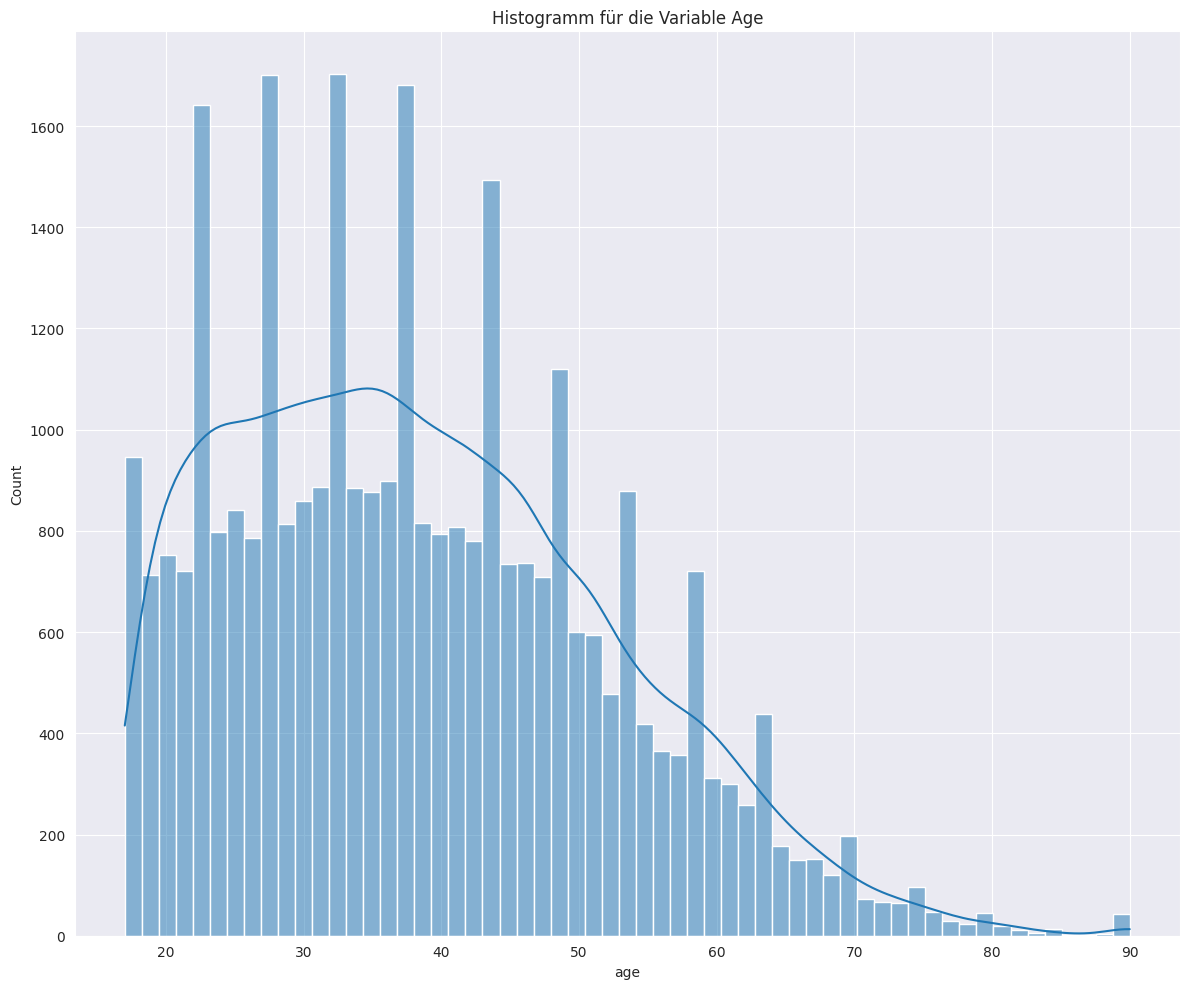

In [16]:
helpers.create_diagram(raw_adult_train_df, 'age')

 Das Median-Alter beträgt 37 Jahre. Im Vergleich zu der Gesamtbevölkerung der USA 1994 betrug das [Median-Alter](https://www.tampabay.com/archive/1994/03/16/u-s-median-age-33-7/). Das ist realistisch, dass das Median Alter in dem mir vorliegenden Datensatz höher ist, da das Mindestalter hier 17 Jahre ist. Das Census Bureau befragt sowohl in den Cenusus Daten als auch im CPS nur Personen ab 16 Jahren. 

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


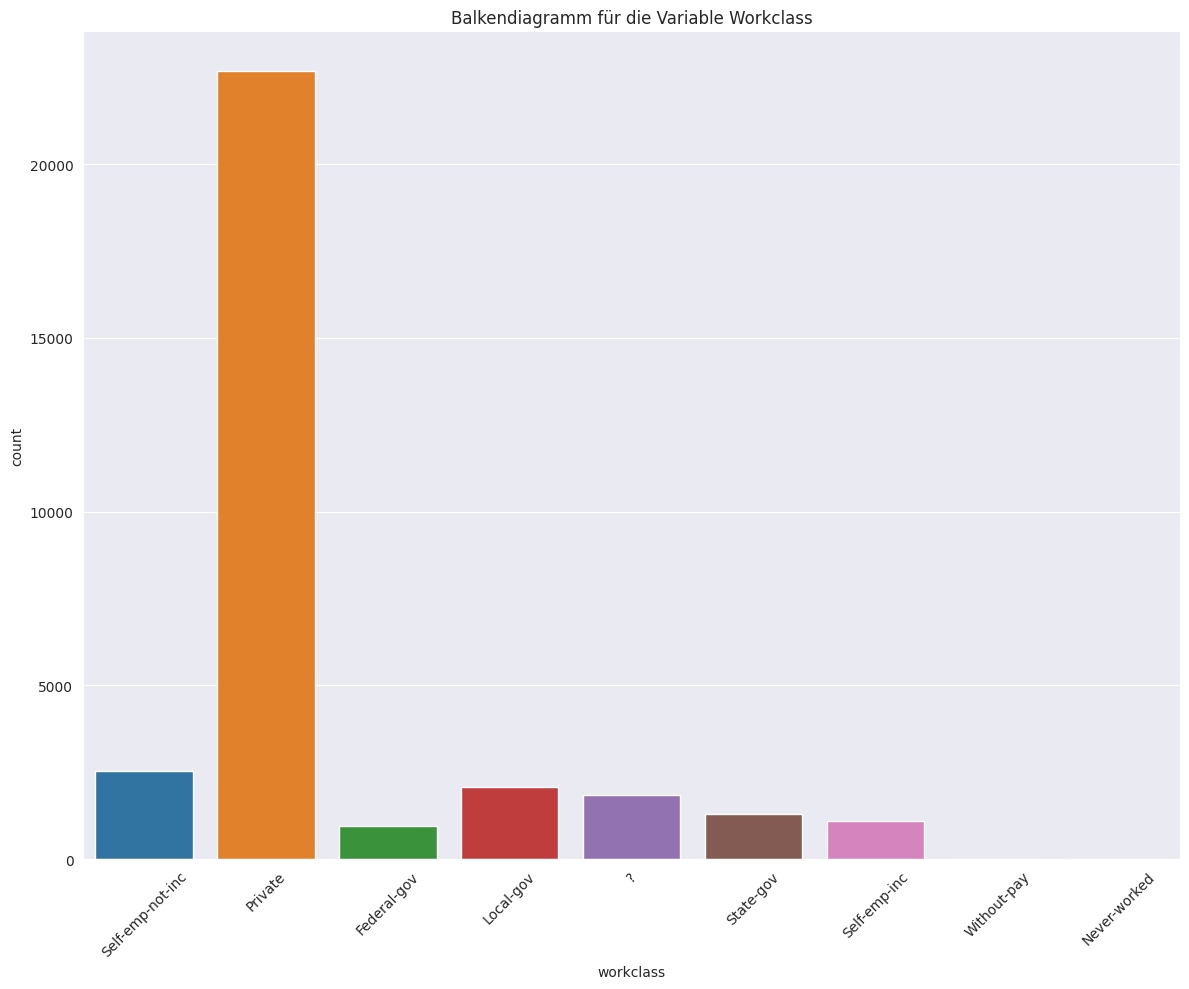

In [17]:
helpers.create_diagram(raw_adult_train_df, 'workclass')

Auf den ersten Blick scheinen die meisten Personen im Privaten-Sektor zu arbeiten. 
Keine Werte, bzw. Fragezeichenwerte, diese müssen bei dem Bereinigunsschreitt 

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


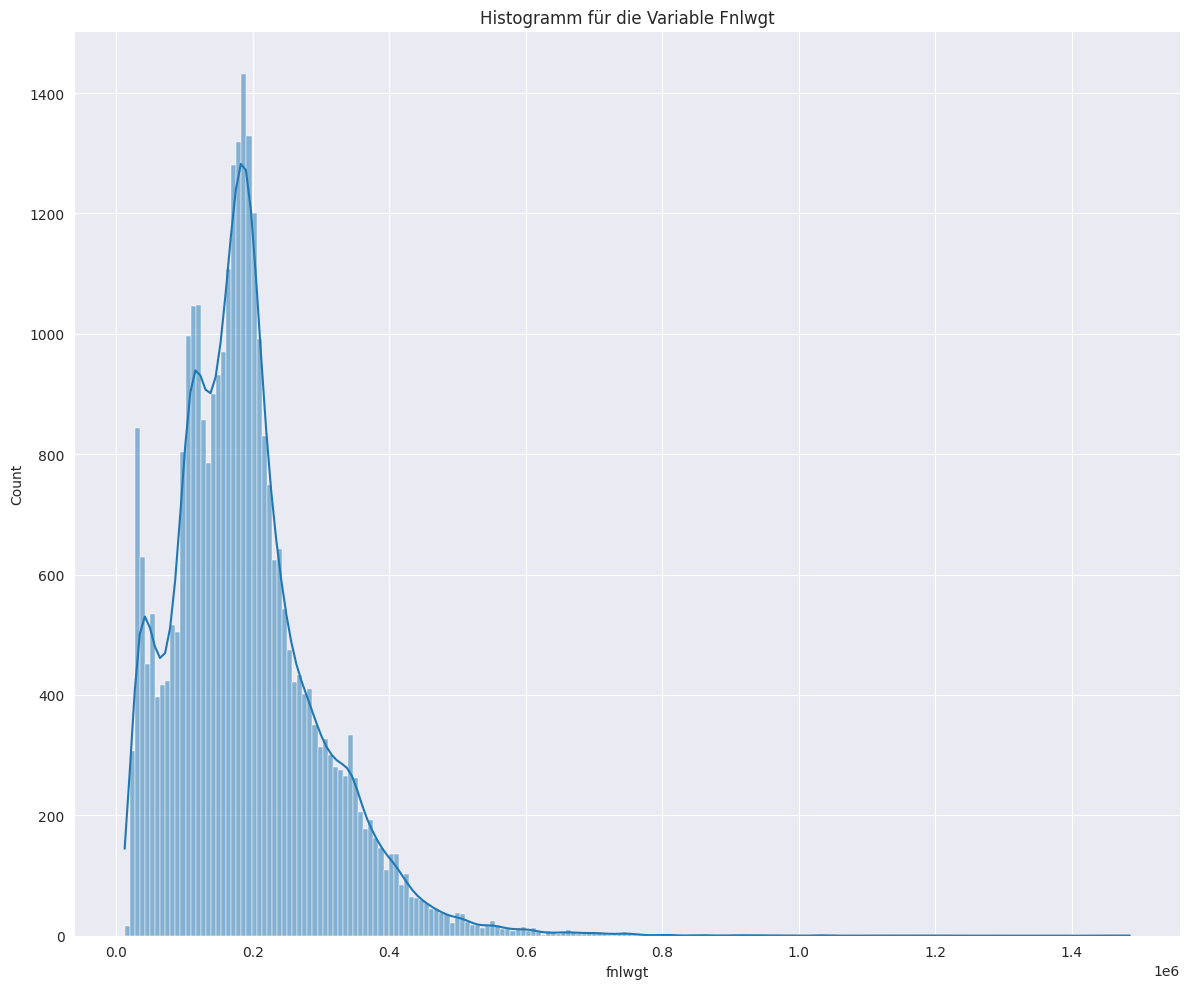

In [18]:
helpers.create_diagram(raw_adult_train_df, 'fnlwgt')

Mit der Variable `fnlwgt` (final weight) ist das Gewicht der Personen, die laut US Cenus Bureau das gleiche Merkmal aufweisen. MIt anderen worten, das [final weight](https://www.census.gov/programs-surveys/cps/technical-documentation/methodology/weighting.html) ist die Anzahl der Personen, die laut CPS bzw. Census Bureau den Eintrag repräsentieren. Die Frage, die sich mir nun stellt: Wie kann ich das *Gewicht* für alle Spalten berücksichtigen, bzw. welchen Einfluss hat dieses auf meine Werte. Aus diesem Grund werde ich mir im Folgenden noch einmal genauer die Variable `fnlwgt` anschauen, um eine qualifizierte Aussage über das weitere Vorgehen treffen zu können. 

In [19]:
raw_adult_train_df['fnlwgt'].describe()

count    3.254500e+04
mean     1.897818e+05
std      1.055608e+05
min      1.228500e+04
25%      1.178160e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [20]:
raw_adult_test_df['fnlwgt'].describe()

count    1.626600e+04
mean     1.894271e+05
std      1.057282e+05
min      1.349200e+04
25%      1.167528e+05
50%      1.778280e+05
75%      2.383840e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

Der gesamte Wert der Trainingsdaten ist über 3 Milliarden. Bei den Testdaten bei ca. 1,6 Millarden. 1994 lag die Gesamtbevölkerung der USA bei ca. 263 400 000. Der maximale Wert, den ein Gewicht annimmt ist bei ca. 14,8 Mio und der minimale Wert liegt bei 12 285 000. Schauen wir uns nun einmal die Verteilung der Gewichte in Bezug auf die Männer und Frauen an. 



In [21]:
male_weight = 0
female_weight = 0
num_males = 0

# Loop through the DataFrame rows
for index, row in raw_adult_train_df.iterrows():
    fnlwgt = int(row['fnlwgt'])
    sex = row['sex']

    # Check the category (sex) and update the corresponding sum
    if sex == 'Male':
        male_weight += fnlwgt
        num_males += 1
    elif sex == 'Female':
        female_weight += fnlwgt

# Output the results
print("Male Weight:", male_weight)
print("Female Weight:", female_weight)
print("ratio: ", male_weight / (male_weight + female_weight))
print('num males', num_males)
print('male ratio', num_males / raw_adult_train_df['sex'].count())

Male Weight: 4176725550
Female Weight: 1999722287
ratio:  0.6762342466456743
num males 21779
male ratio 0.6691964971577815


Um zu schauen, welchen Einfluss das Gewicht auf die Repräsentanz der Daten auf die gesamte Bevölkerungstatistik der USA hat, habe ich das Gewicht, auf die Kategorie `Geschlecht` angewendet. Es zeigt sich, dass auch durch das Gewicht, der Bias in den Daten sich nicht verändert. Aus diesem Grund werde ich bei der Datenbereinigung und -transformation darauf eingehen, ob diese für meinen Algorithmus berücksicht wird. 

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


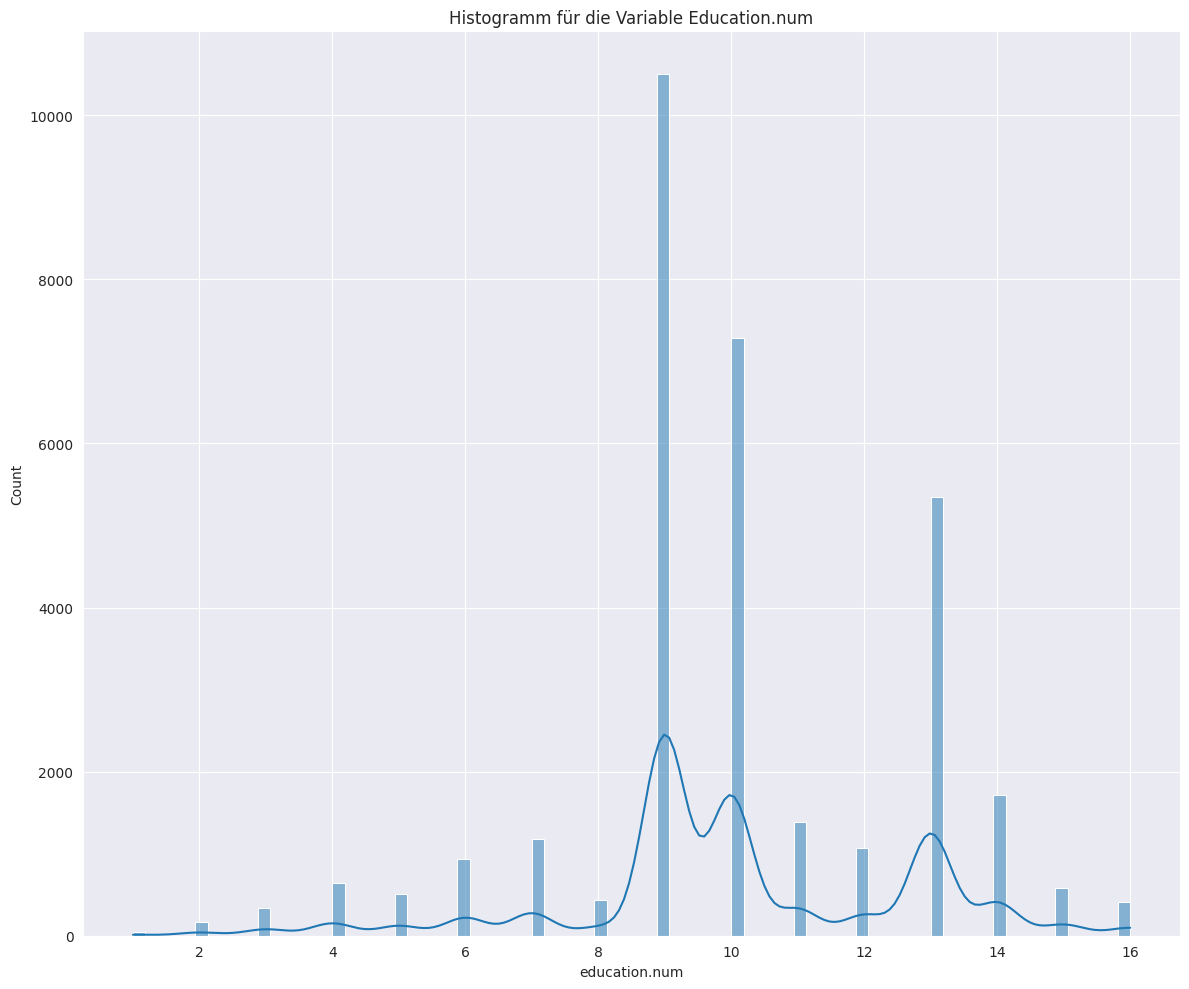

In [22]:
helpers.create_diagram(raw_adult_train_df, 'education.num')

Diese Varialbe zeigt, die Anzahl an Jahre, in der eine Person in einer Bildungseinrichtung war. Die größte Ausprägung sind bei 9 Jahren, 10 Jahren und 13 Jahren. Da die [Alpahbetisierungquote](https://de.wikipedia.org/wiki/Alphabetisierung_(Lesef%C3%A4higkeit) in den USA auch sehr hoch ist, ist der durschnittliche höchste Bildungsgrad ein Highschool Abschluss. Aus den Sozialwissenschaften ist bekannt, dass Bildung auch immer eine [Chancenfrage](https://www.probonoinst.org/2023/07/13/race-income-and-the-effect-on-educational-opportunity/) ist und u.a. mit *Einkommen*, *Ethnie* zusammenhängt. Bei dieser Statistik muss auch berücksichtigt werden, dass Universitäten und Colleges in den USA sehr hohe Studiegebühren haben und dies auch eine Auswirkung auf den höchten Bildungsgrad hat. Mit Blick auf die Census Daten von 1990 sind diese Zahlen repräsentativ auf die Gesamtbevölkerung der USA. 



/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


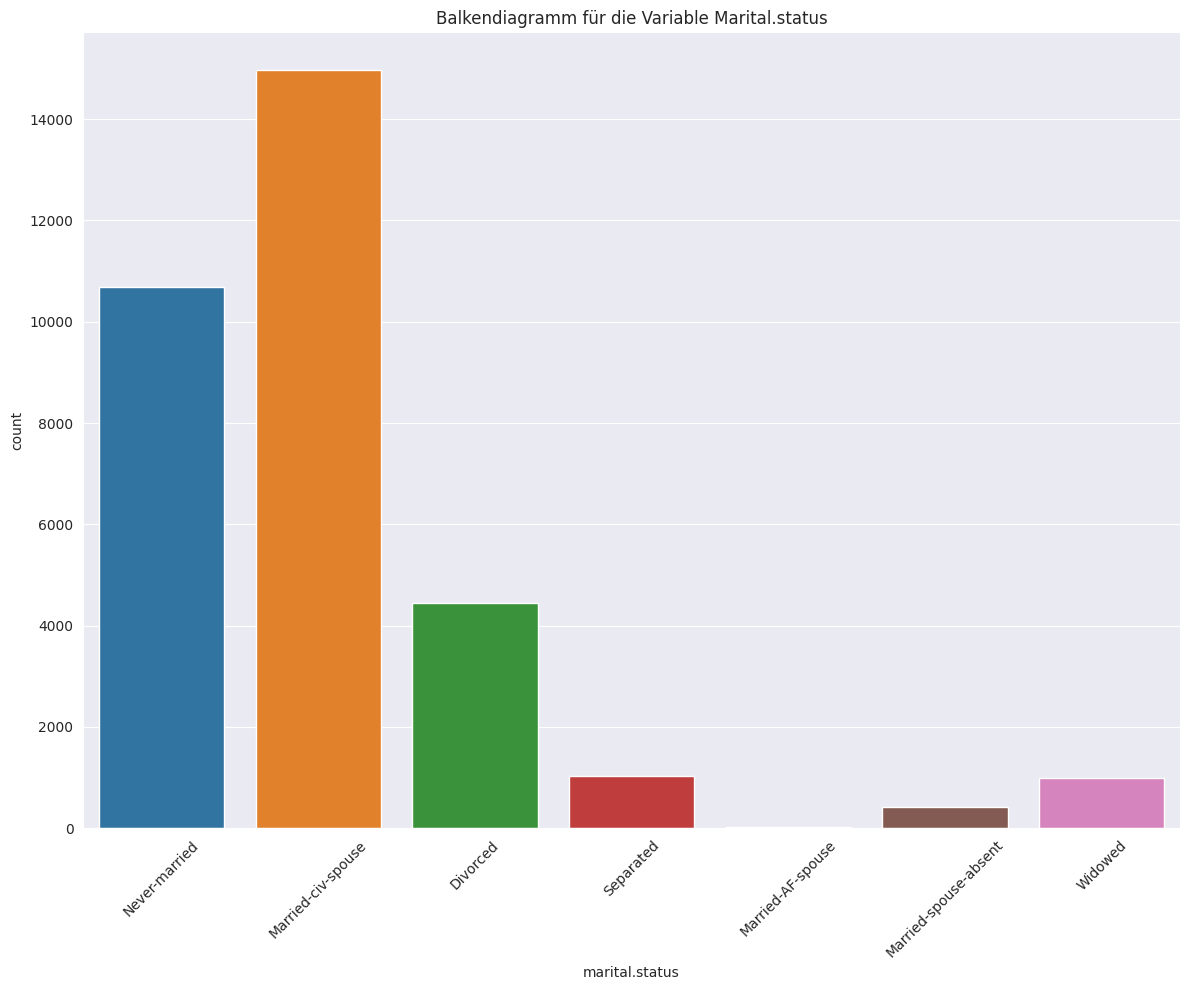

In [23]:
helpers.create_diagram(raw_adult_train_df, 'marital.status')

In diesem Balkendiagramm ist zu sehen, dass die Mehrheit der befragten Personen verheiratet sind. Es gibt in den Sozialwissenschaften verschiedene [Studien](https://www.stlouisfed.org/on-the-economy/2020/september/taking-closer-look-marital-status-earnings-gap, die das Einkommen und den Familienstand betrachten. 

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


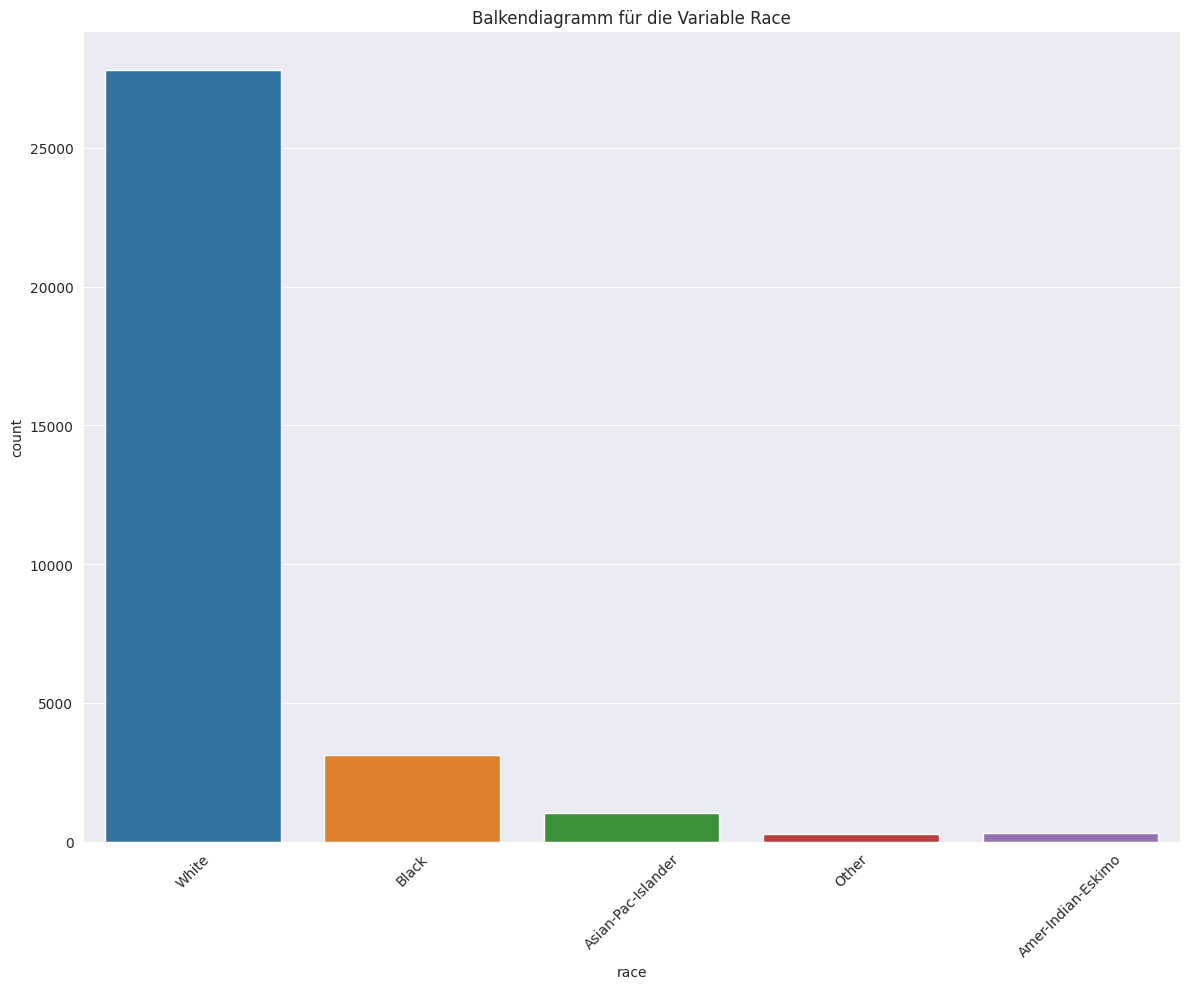

In [24]:
helpers.create_diagram(raw_adult_train_df, 'race')

Bei der Kategorie `race` ist zu sehen, dass die Mehrheit sich selbst als *white* identifiziert. Wenn man sich die Bevölkerungszusammensetzung aus dem [Census](https://www.census.gov/library/publications/1992/dec/cp-1.html) von 1990 anschaut, so ist zu erkennen, dass sich ungefähr 73% als *White*, 12% als *Black or African American*, ca. 10% als *Hispanic*, ca. 3-4% *Asian* und ca. 1-2% *Native American* bezeichnen. Wenn wir diese Zahlen mit dem Diagramm vergleichen so fällt sofort auf, dass es *Hispanic* nicht als Daten vorhanden sind. Das muss auch im Weiteren berücksichtigt werden, da die Hispanic-Community in den 1990er Jahren in den USA vertreten war. In den Fragen des CPS, wurde sowohl nach `race` als auch nach `ethnicity` gefragt. Jediglich konnte unter der Frage `ethnicity`angegeben werden, ob man eine *Hispanic Origin* hat. Dies könnte ein Grund sein, warum *Hispanic* nicht in diesen Daten aufgeführt wird. Dennoch ist es auch bei der weiteren Interpretation wichtig, diesen Bias zu berücksichtigen. 
Ob sich Personen, die sich selbst als *Hispanic* bezeichnen bei dieser Frage selbst als *white* identifizieren, bleibt eine Mutmaßung. Aus diesem Grund gehe ich bei der Kategorie auch von einem Bias aus. 



/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


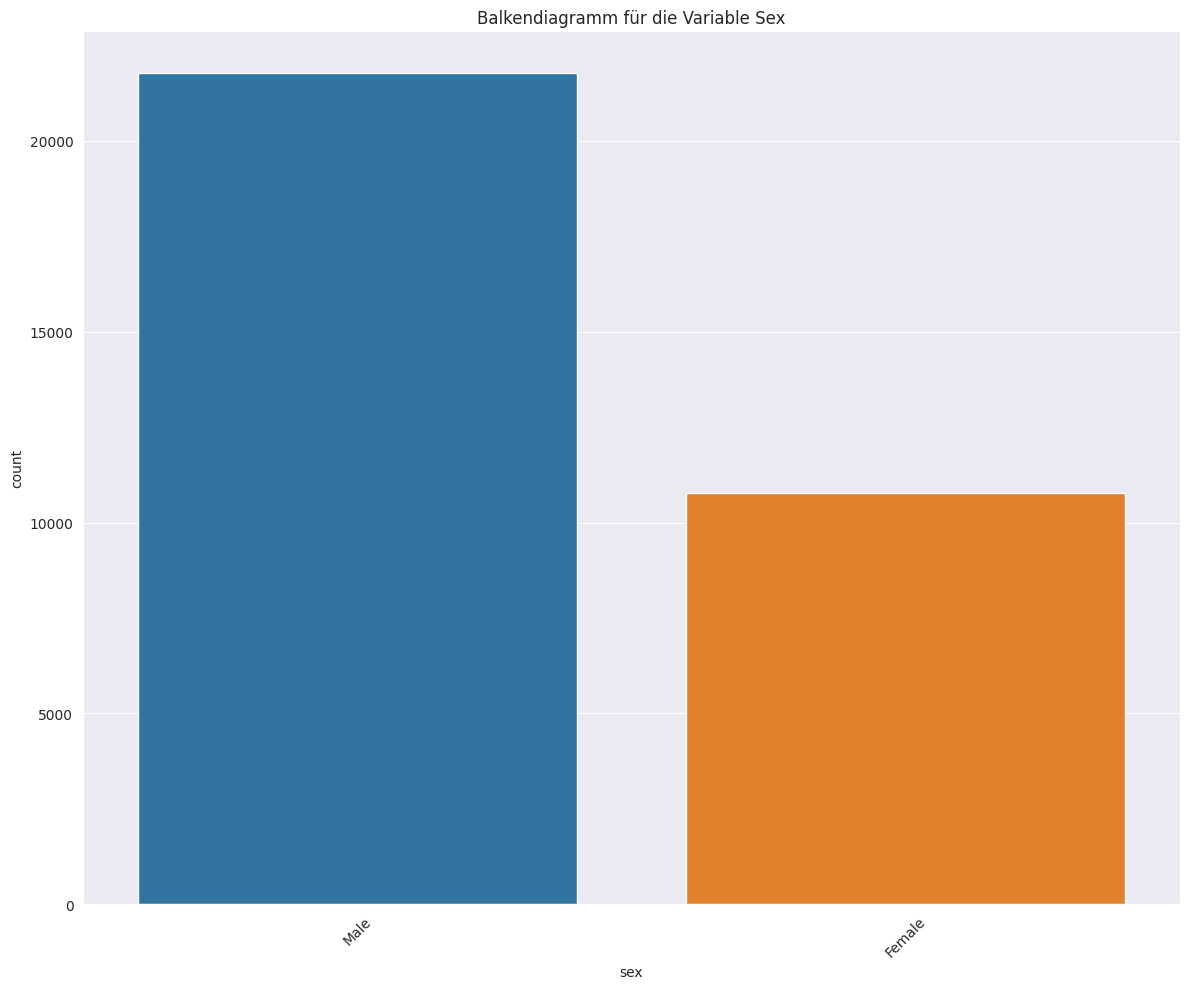

In [25]:
helpers.create_diagram(raw_adult_train_df, 'sex')

Es fällt sofort auf, dass der Datensatz einen Gender-Bias enthält. Wenn man sich die [CPS-Daten](s://www.census.gov/data/datasets/1994/demo/cps/cps-basic-1994.html) von Juni 1994 anschaut und die [Census Daten](https://www.census.gov/library/publications/1992/dec/cp-1.html) von 1990 
ist zu erkennen, dass die Geschlechter ausgewogener sind. Besonders in den Census-Daten kann man von einer Gender-Balance ausgehen. Da dieser Bias auch nicht mit der Variablen `fnlwgt` ausgeglichen werden kann, werde ich dies in den weiteren Schritten berücksichtigen, besonders bei der Ergebnisevaluation. 

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


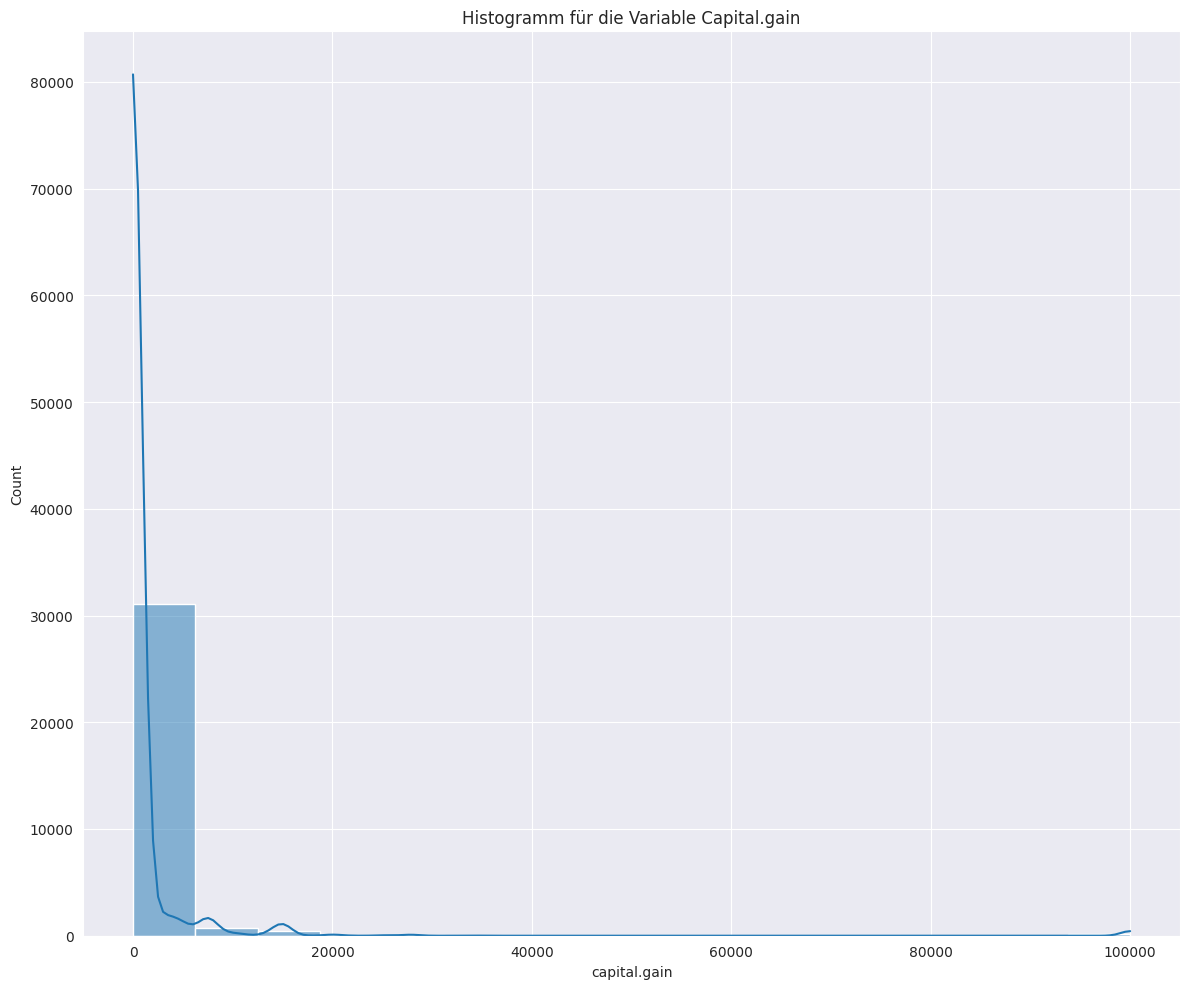

In [26]:
helpers.create_diagram(raw_adult_train_df, 'capital.gain')

Bei der Variablen `captital.gain` also dem Vermögenszuwachs einer Person, ist zu erkennen, dass wenige Personen aus dem Datensatz angaben einen Vermögenszwachs zu haben. Für die Interpretation dieser Kategorie wäre eine weitere Aufschlüsselung nötig. Zum Beispiel müsste die
Inflation von 1994 berücksichtigt werden. Da aus dem Datensatz nicht zu erkennen ist, aus welchem Monat die Daten sind, können auch die Bewegung der Aktienmärkte nicht berücksichtigt werden. Auch die Inflation der Immobilienmärkte müsste für die genaue Interpretation berücksichtigt
werden. Aus den Daten ist auch nicht zu erkennen, ob zu einem einmaligen Vermögenzuwachs wärehnd der befragten Zeit kam (z.B. Erbschaft, Schenkung) oder ob es sich um einen beständigen Vermögenszwuchs handelt. 


/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


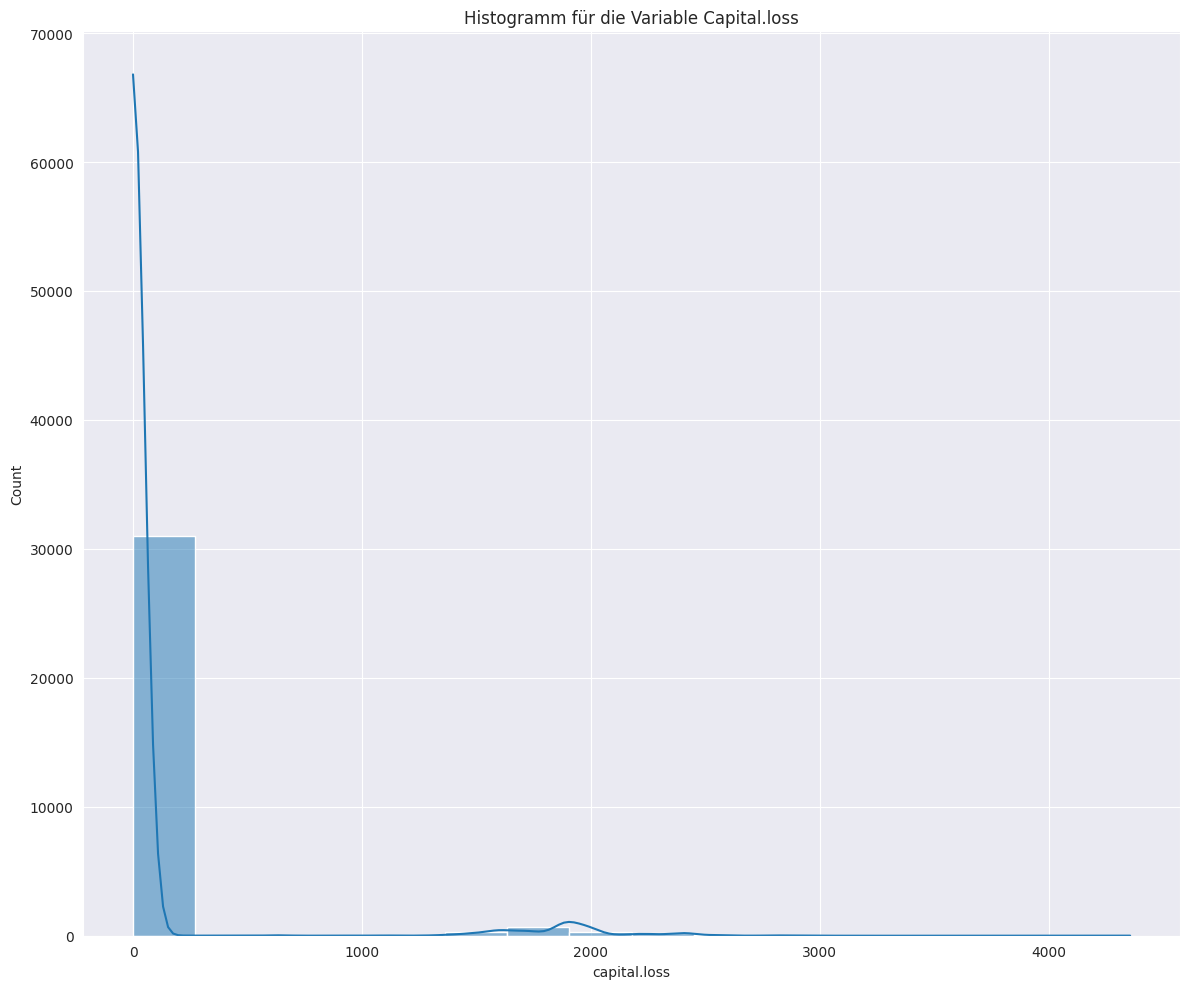

In [27]:
helpers.create_diagram(raw_adult_train_df, 'capital.loss')

Wie schon bei der vorherigen Varialben `capital.gain` beschrieben, treffen diese Aussagen auch auf die diese Varialbe `capital.loss` zu. Verluste von Vermögen können aufgrund der fehlenden Informationen nicht ausreichend interpretiert werden. 

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


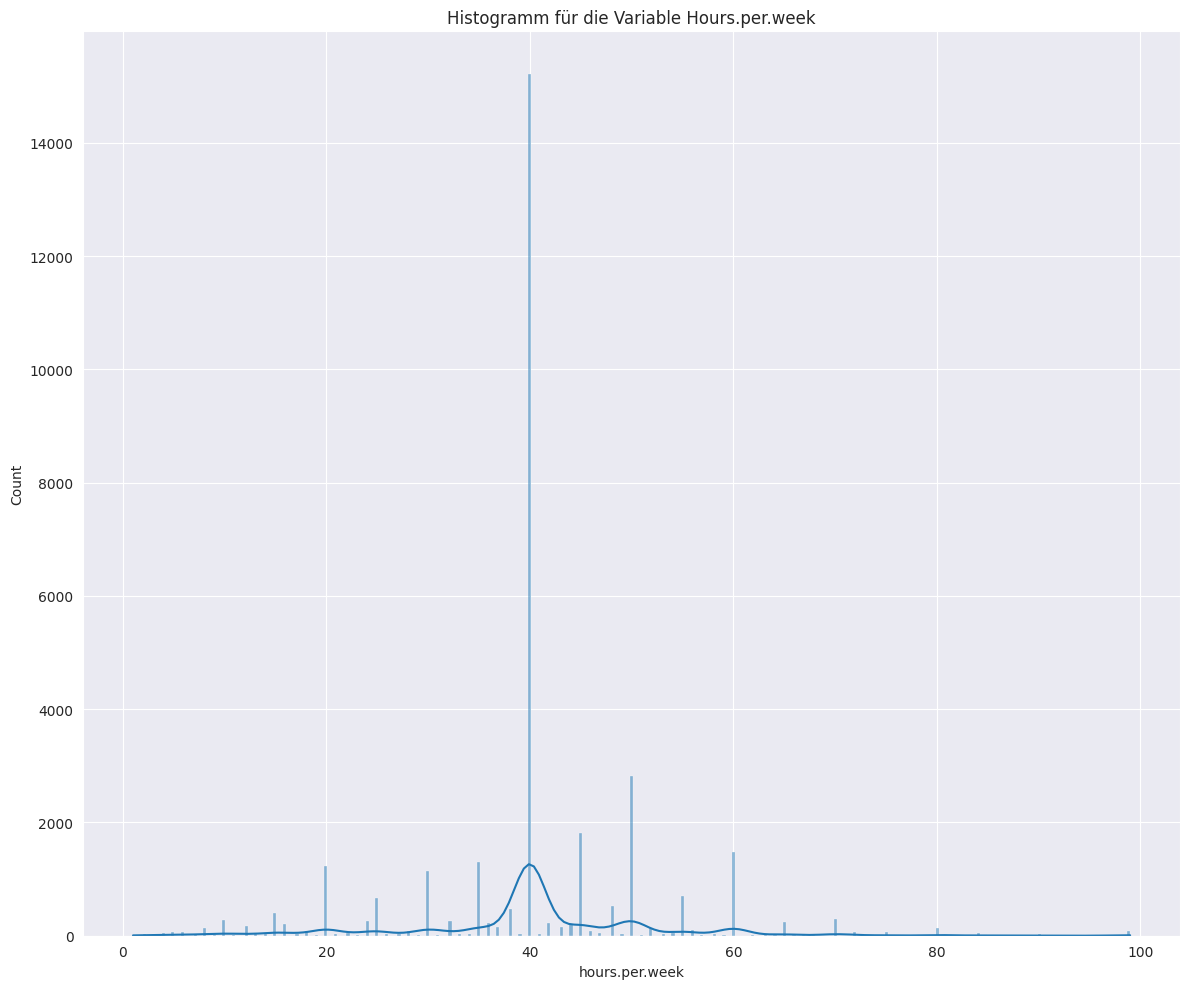

In [28]:
helpers.create_diagram(raw_adult_train_df, 'hours.per.week')


Durchschnitt liegt die wöchentliche Arbeitszeit bei 40 Stunden. Es gibt ein paar Personen, die wöchentlich bis zu 99 Stunden pro Woche arbeiten. Das ist sehr hoch und muss auch noch einmal bezüglich der Ausreißer im nächten Kapitel genauers betrachtet werden. Dennoch sind die Werte nicht unrealistisch und es muss bedacht werden, dass es Personen gibt, die teilweise zwei bis drei Jobs haben und die Anzahl an der wöchentlichen Arbeitszeit eine Selbsteinschätzung ist. 

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


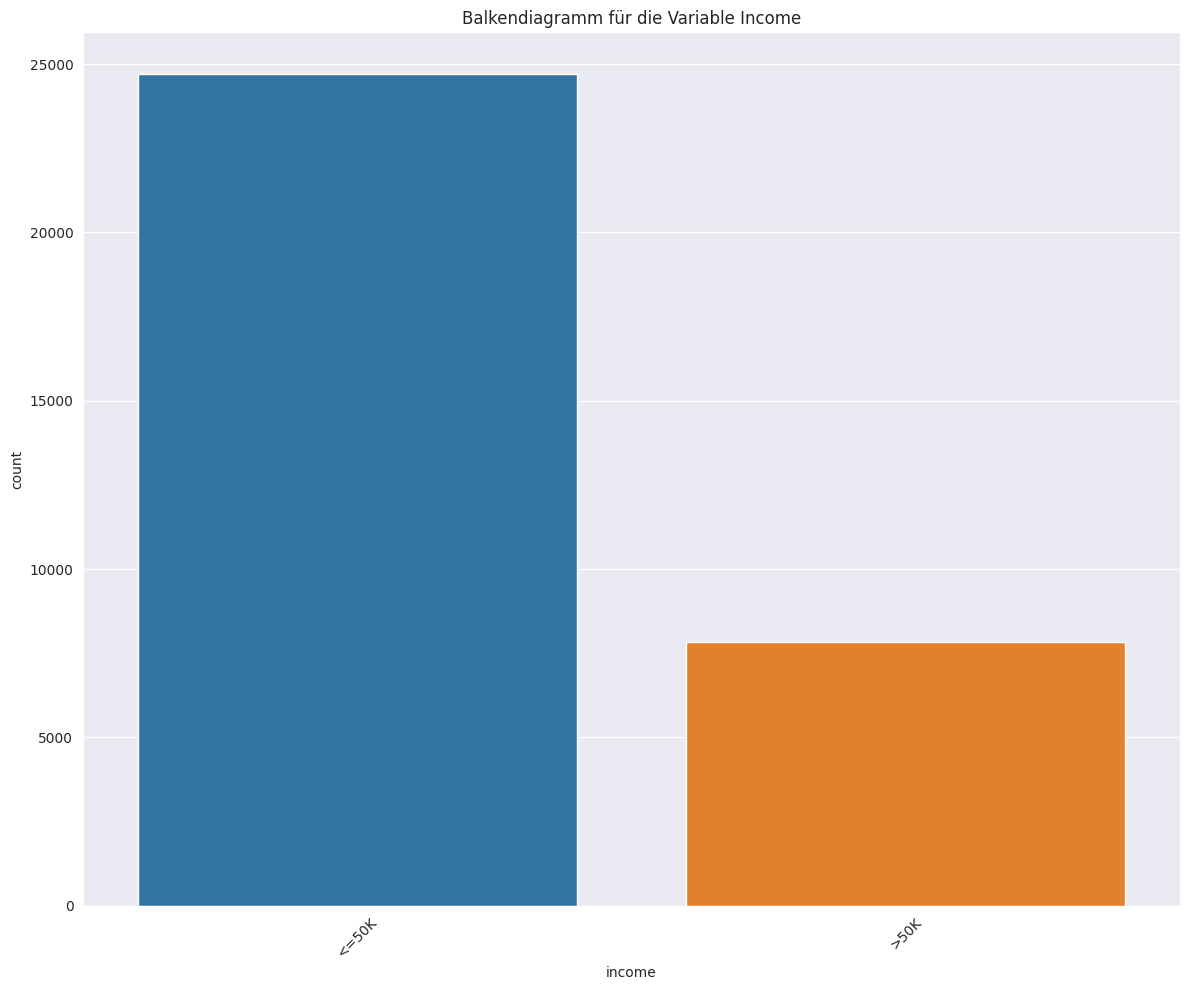

In [29]:
helpers.create_diagram(raw_adult_train_df, 'income')

Es ist zu sehen, dass die Mehrheit der Personen <=50 000 US Dollar verdienen. Im Jahr 2023 entsprächen 50 000 US Dollar von 1994 ungefähr [103.000 US Dollar] (https://www.in2013dollars.com/us/inflation/1994?amount=50000). Wenn man das [Median-Einkommen](https://www.statista.com/statistics/200838/median-household-income-in-the-united-states/) von 1994 in den USA betrachtet, lag dieses bei ca. 35 492 US Dollar. 2022 war das Median-Einkommen in den USA bei 74 580 US Dollar. Es ist festzustellen, dass beim Wert >50 000 US Dollar auf jeden Fall die obere Einkommensschicht gemeint ist. In diesem Datensatz lässt sich keine regionale Verteilung der Personen erkennen. Konkret bedeutet dies, dass es einen Unterschied macht, ob eine Person >50 000 US Dollar in einer strukturell schwächeren Region verdient oder in New York City lebt. Da Wohnungspreise, Lebensunterhaltungskosten, berücksichtigt werden müssen. Dies könnte dann auch Rückschlüsse auf einen Vermögenszuwachs oder -verlust geben. 


Zusammenfassend kann gesagt werden, dass die vorliegenden Daten keinen Rückschluss auf eine repräsentative Belvölkerungsstatistik machen. Auch nicht auf die US-Bevölkerung >=16 Jahre. Für die weitere Analyse werde ich diese Erkenntnis berücksichtigen. 
Im Folgenden werde ich die Beziehung zwischen einzelnen Variablen analyieren. Auch unter Berücksichtigung der Hypothese. Bei den Einzeldiagrammen fiel auf, dass die Mehrzahl sich als männlich und `white` bezeichnet. Dies werde ich nun noch einaml aufgreifen. 




/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/u

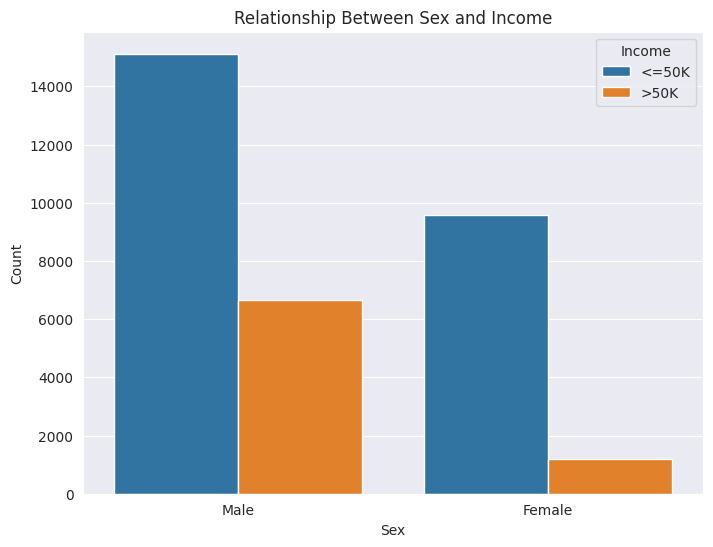

In [30]:
#Create bar diagrams for the relation
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='income', data=raw_adult_train_df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Relationship Between Sex and Income')
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])
plt.show()

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/u

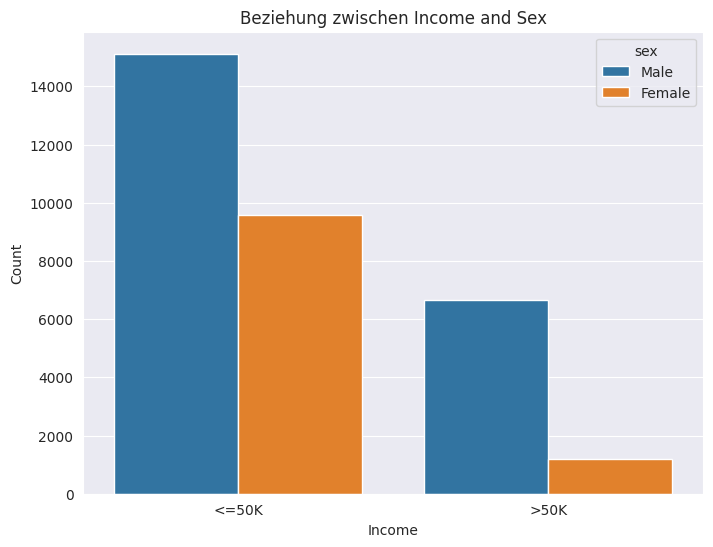

In [31]:
helpers.create_bar_diagram_relationship(raw_adult_train_df, 'income', 'sex')

In diesem Diagramm ist deutlich ein Gender-Pay-Gap zu erkennen. 

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/u

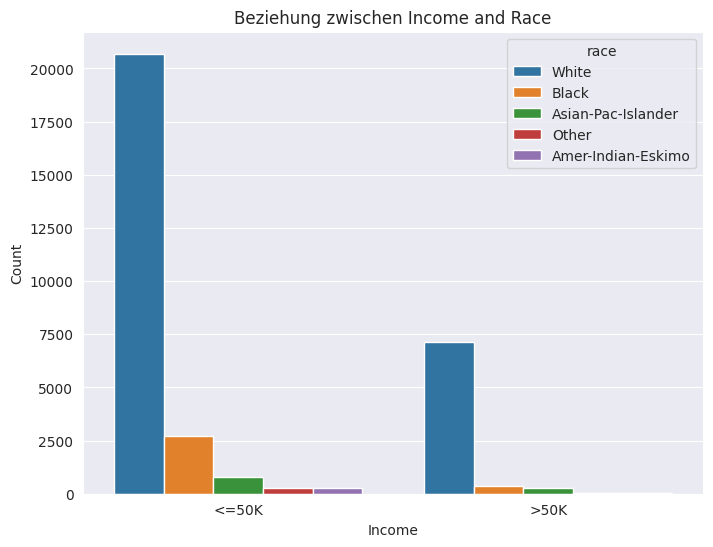

In [32]:
helpers.create_bar_diagram_relationship(raw_adult_train_df, 'income', 'race')

Es ist zu sehen, dass es bei den Ethnien und der Einkommensverteilung einen Zusammenhang geben könnte. 

/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


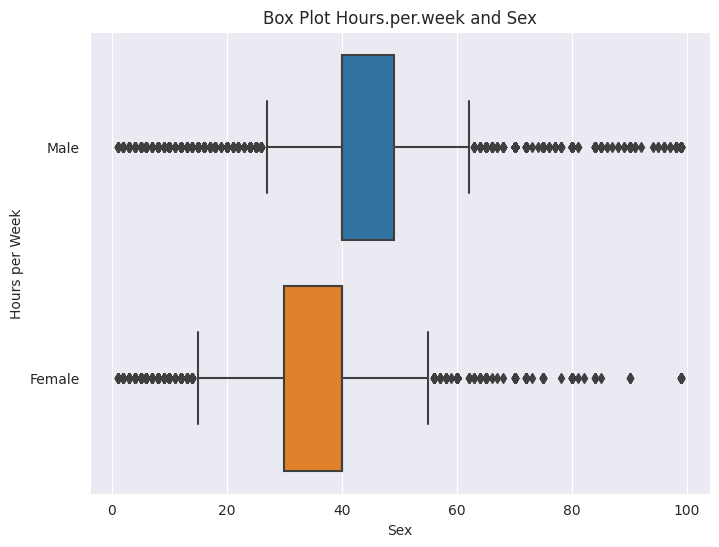

In [33]:
helpers.create_boxplot_diagram_relationship(raw_adult_train_df, 'hours.per.week', 'sex')

Um noch einmal Daten in bestimmte Kriterien aufzuteilen, nutze ich im Folgendnen die Funktion für ein Pandas Dataframe `groupby()`. 

In [34]:
# Group by 'sex' and 'income', then calculate mean age and mean hours.per.week
grouped_data = raw_adult_train_df.groupby(['sex', 'income'])[['age', 'hours.per.week']].agg(
    {'age': 'mean', 'hours.per.week': 'mean'})

grouped_data_test = raw_adult_test_df.groupby(['sex', 'income'])[['age', 'hours.per.week']].agg(
    {'age': 'mean', 'hours.per.week': 'mean'})

print(f' Für die Trainingsdaten gelten \n', grouped_data)
print('-------------------------------------------')
print(f' Für die Testdaten gelten \n', grouped_data_test)

 Für die Trainingsdaten gelten 
                      age  hours.per.week
sex    income                           
Female <=50K   36.211619       35.918544
       >50K    42.134975       40.418506
Male   <=50K   37.145483       40.694948
       >50K    44.629112       46.364128
-------------------------------------------
 Für die Testdaten gelten 
                      age  hours.per.week
sex    income                           
Female <=50K.  36.422949       35.794739
       >50K.   42.406780       41.183051
Male   <=50K.  37.448861       40.779387
       >50K.   44.667179       46.187635


Eine interessante Beobachtung ist, dass die Frauen im Durchschnitt drei Jahre jünger sind als die Männer die >50K$ verdienen und durchschnittlich vier Stunde weniger pro Woche arbeiten. Da der Datensatz wie schon beschreiben einen Bias aufwirft, was u.a. das Geschlecht betrifft, müssten die Zahlen noch einmal genauer im Verhältnis mit der Gesamtbevölkerungsstatistik verglichen werden. 

In [35]:
# Group by 'sex' and 'workclass', then calculate mean age and mean hours per week
grouped_data = raw_adult_train_df.groupby(['sex', 'income'])[['education.num', 'hours.per.week']].agg(
    {'education.num': 'median', 'hours.per.week': 'mean'})
grouped_data_test = raw_adult_test_df.groupby(['sex', 'income'])[['education.num', 'hours.per.week']].agg(
    {'education.num': 'median', 'hours.per.week': 'mean'})
print(f' Für die Trainingsdaten gelten \n', grouped_data)
print('-------------------------------------------')
print(f' Für die Testdaten gelten \n', grouped_data_test)

 Für die Trainingsdaten gelten 
                education.num  hours.per.week
sex    income                               
Female <=50K            10.0       35.918544
       >50K             13.0       40.418506
Male   <=50K             9.0       40.694948
       >50K             12.0       46.364128
-------------------------------------------
 Für die Testdaten gelten 
                education.num  hours.per.week
sex    income                               
Female <=50K.           10.0       35.794739
       >50K.            13.0       41.183051
Male   <=50K.            9.0       40.779387
       >50K.            12.0       46.187635


In [36]:
# Filter the DataFrame to include only rows where 'hours.per.week' is 70 or greater
high_hours_df = raw_adult_train_df[raw_adult_train_df['hours.per.week'] > 70]

# Group the filtered DataFrame by 'sex' and count 
gender_counts = high_hours_df.groupby('sex').size()

print("Anzahl an Frauen und Männer, die mehr als 70 Stunden pro Woche arbeiten :")
print(gender_counts)

Anzahl an Frauen und Männer, die mehr als 70 Stunden pro Woche arbeiten :
sex
Female     82
Male      415
dtype: int64


Nachdem ich nun unterschiedliche Beziehungen zwischen den Variablen mit Diagrammen aufgezeigt habe, möchte ich im Folgenden die Korrelation berechnen. Dafür ist zu beachten, dass in dem Datensatz sowohl kategorische als auch numerische Varialben vorhanden sind. 
Für die numerischen Varialben kann die Korrelatoin mit dem *Pearson-Korrelationskoeffizient berechnet werden. Diese rist zwischen zwei Variablen definiert als 

> $$r = \frac{\sigma_{xy}}{\sigma_x \sigma_y}$$

Dafür wird die Kovarianz der beiden Variablen durch die Standardabweichungen standardisiert. Die Folge hieraus ist, dass der Wert r für die Korrleation immer im Bereich [-1,1] ist. Dabei steht nur die absolute Größe des Wertes für das Ausmaß des Zusammenhangs. 


/home/mareike/.cache/pypoetry/virtualenvs/us-census-analysis-JBZQTTRA-py3.10/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


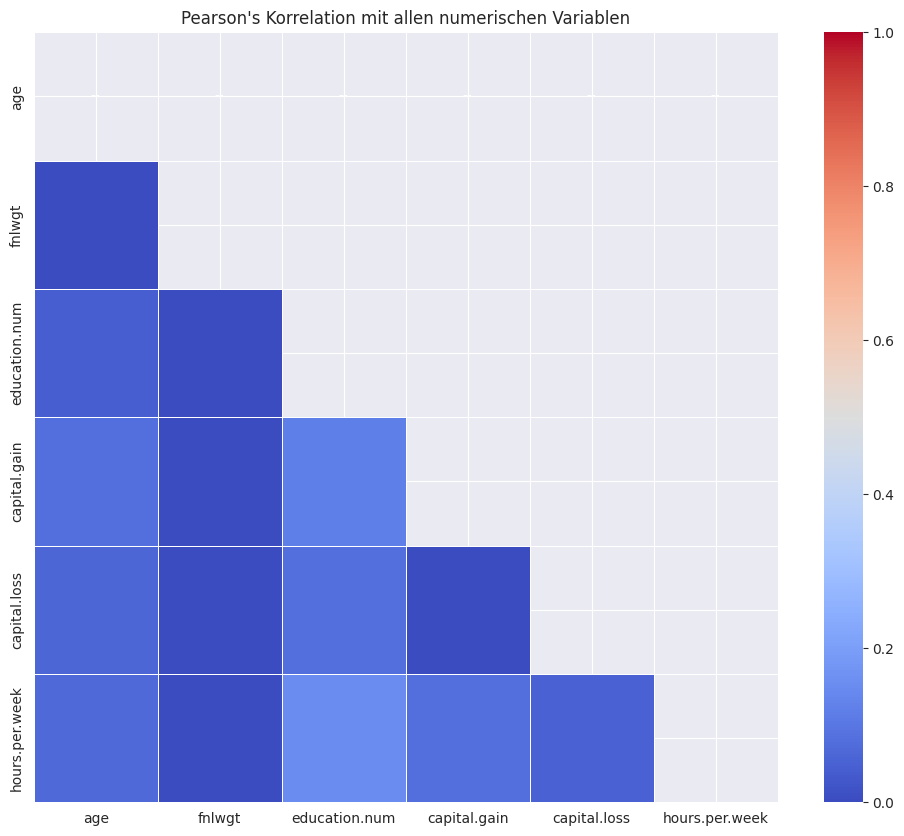

In [37]:
# Filter numerical columns
numerical_columns = raw_adult_train_df.select_dtypes(include=[np.number])

# Calculate Pearson's correlation coefficients
corr = numerical_columns.corr().round(decimals=2)

# Create a mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap to show the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(data=corr, annot=True, vmin=0, vmax=1, linewidths=0.5, cmap='coolwarm', mask=mask)
plt.title('Pearson\'s Korrelation mit allen numerischen Variablen')
plt.show()

Die Korrelation zeigt, dass es zwischen den Variablen keine so große Korrelation gibt. Da die Zielvariable `income` noch kein numerischer Wert ist, taucht dieser im Graph nicht aus. 
Dennoch kann mit den numerischen Korrelationen kaum eine qualifizierte Aussage getroffen werden. 





## 3. Bereinigung des Datensatzes und Datentransformation 

In diesem Teil werden die Daten bereinigt. Folgende Schritte werde ich nun nacheinander durchführen:

1. Zusammenführung der Test- und Trainingsdaten & Erstezen von fehlenden Werten
2. Umgang mit Duplikaten
3. Datentransformation



### 3.1 Zusammenfürhung der Test- und Trainigsdaten & Ersetzen von fehlenden Werten. 
In Kapitel 2 Datenexploration wurde deutlich, dass die Trainings-und Testdaten sehr ähnliche Ausprägungen haben. Zum Beispiel waren die Mittelwerte, Min/Max bei den numerischen Variablen bis auf wenige Nachkommastellen identisch. Für die Datenbereinigung und -transformation möchte ich die beiden Datensätze nun zusammenführen, um gemeinsame Bereiniungs- und Transformationsprozesse anzuwenden. Für die Datenzusammenführung habe ich wieder in der gesonderten Python-Datei eine Funktion formuliert. Wie in Kapitel 3 schon bemerkt, gibt es in drei Spalten `?`-Werte. Diese werden nun durch NaN-Werte ersetz. 

In [38]:
helpers.merged_data(raw_adult_train_df, raw_adult_test_df)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
1,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
2,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
3,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
4,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16261,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16262,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16263,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16264,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


Die Datenzusammenführung sind gut aus. Es sind weiterhin 15 Spalten und die Gesamtzahl n= 48811 was die 

In [39]:
#Rename the merged data and convert it to a dataframe 
total_adult_data_df = helpers.merged_data(raw_adult_train_df, raw_adult_test_df)

In [40]:

total_adult_data_df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
1,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
2,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
3,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
4,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [41]:
#Check if there are no '?' (NaN) values in the DataFrame with a loop
no_question_marks = total_adult_data_df.isna().any().any()

if not no_question_marks:
    print("Es gibt keine '?'-Werte im Datensatz.")
else:
    print("Es gibt '?'-Werte im Datensatz.")

Es gibt '?'-Werte im Datensatz.


Da es Außerdem gab es bei den Test-Daten in der Spalte `income`eine abweichende Bezeichnung der Werte. Auch dies wird nun bereiningt. 

In [42]:
#Replace names so that they are consistent in the merged dataframe 
total_adult_data_df['income'].replace('<=50K.', '<=50K', inplace=True)
total_adult_data_df['income'].replace('>50K.', '>50K', inplace=True)


### 3.2 Umgang mit Duplikaten 
Im Folgenden werde ich nun testen, ob es Duplikate in dem Datensatz gibt, die dann entfernt werden müssen. 

In [43]:
total_adult_data_df.duplicated().sum()

52

In dem Datensatz gibt es anscheinend 52 Duplikate. Diese werden im Folgenden nun entfernt. 

In [44]:
rows = total_adult_data_df.shape[0]

total_adult_data_df.drop_duplicates(inplace=True)

rows - total_adult_data_df.shape[0]

52

Das Entfernen der Duplikate hat funktioniert. 

### 3.3 Datentransformation 
Für die weitere Bearbeitung des Datensatzes auch im Hinblick auf die Vorbereitung der Modellierung, erstelle ich nun eine zweite Version des Datensets, die für die weiteren Schritte (Datentransformation) genutzt wird. Diese Schritte werde ich nicht mehr im Rahmen der Grundmodellierung durchführen. 

In [45]:
total_adult_data_df_1 = total_adult_data_df

Wie schon in der Datenexploration beschrieben, werde ich bei dem Training des Modells die Kategorie `fnlwgt`nicht berücksichtigen. 
Aus diesem Grund werde ich diese nun aus dem Datensatz entfernen. 


In [46]:
#Drop weight column 
total_adult_data_df_1 = total_adult_data_df_1.drop(['fnlwgt'], axis=1)

total_adult_data_df_1.head(5)


,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,25,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
1,32,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
2,38,Private,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
3,43,Self-emp-not-inc,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
4,40,Private,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


### 4. Datenmodellierung und Evaluierung 

#### 4.1 Modellentwicklung und Training 

Bei der Auswahl des Modell habe ich mich ersteinmal für den Algorithmus des `Random-Forest` entschieden. Der Random-Forest-Algorithmus basiert auf dem Desiciontree.Das bedeutet, dass er mehrere Entscheidungsbäume verwendet,
um Vorhersagen zu treffen. Der Vorteil eines Ensemble-Algorithmus besteht darin, dass er die Varianz in den Vorhersagen verringern kann, wodurch diese genauer werden. Der Random-Forest-Algorithmus erreicht dies, indem er die 
Vorhersagen der einzelnen Entscheidungsbäume mittelt. Der Random-Forest ist flexibel und bietet eine hohe Genaugikeit, da der das Problem des *Overfittings* durch die Kombination der Ergebnisse mehrere `Desicionstrees`. 



Zunächsteinmal werden die unabhängigen Variablen dem x zugeteilt und die abhängige Varialbe dem y. 

In [47]:
# Data Preparation 
encoder = LabelEncoder()

for col in total_adult_data_df_1.columns:
    if total_adult_data_df_1[col].dtype == 'object':
        total_adult_data_df_1[col] = encoder.fit_transform(total_adult_data_df_1[col])

#he dataset is then split into X which contains all the independent features and Y which contains the dependent feature ‘Income’.
x = total_adult_data_df_1.drop('income', axis=1)
y = total_adult_data_df_1['income']

#Split Data 
features = ['age', 'education.num', 'hours.per.week', 'occupation', 'marital.status', 'workclass', 'race', 'sex',
            'education', 'relationship', 'native.country']

x_train, x_test, y_train, y_test = train_test_split(total_adult_data_df_1[features], total_adult_data_df_1['income'],
                                                    test_size=0.3, stratify=total_adult_data_df_1['income'],
                                                    random_state=42)

#Using Feature Scaling we can standardize the dataset to help the model learn the patterns. 
from sklearn.preprocessing import StandardScaler

for col in x.columns:
    scaler = StandardScaler()
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))

#Random Forest implementation
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

#Accuracy
predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, predicted) * 100, 2))
print('F1 score:', round(f1_score(y_test, predicted) * 100, 2))


Random Forest Classifier:
Accuracy score: 81.75
F1 score: 59.49


Mit Hilfe der `Feature Skalierung` standardisiere ich den Datensatz, um dem Modell beim Erlernen der Patterns zu helfen. 
Der Datensatz wird nun in den Test- und Trainigsdatensatz geteilt. Die Teilung erfolgt 70/30, dh. 30% der Daten werden als Testdaten benutzt. 
a die kategorialen Werte in numerische Werte umgewandelt werden müssen, habe ich mich für das `LabelEncoding` entschieden. Ich habe geschwankt zwischen `TargetEndoding` und `LabelEncoding`, da beim `TargetEncoding` den kategorialen Werten auf der Grundlage der durchschnittlichen Beziehung mit dem Zielmerkmal zusammengefügt werden. Beim Label-Encoder werden die kategorischen Spaltenelemente in numerische Werte umgewandelt. 

Unter Einbezug der Performance-Metriken für Klassifizierungsmodelle möchte ich nun das Modell auf die `Accuracy`hin testen. 

In [48]:
predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, predicted) * 100, 2))
print('F1 score:', round(f1_score(y_test, predicted) * 100, 2))

Random Forest Classifier:
Accuracy score: 81.75
F1 score: 59.49


In [49]:
#Predictions on the Test-Data 
predicted = rf.predict(x_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, predicted)

report = classification_report(y_test, predicted)

print(report)


              precision    recall  f1-score   support

           0       0.87      0.90      0.88     11127
           1       0.63      0.56      0.59      3501

    accuracy                           0.82     14628
   macro avg       0.75      0.73      0.74     14628
weighted avg       0.81      0.82      0.81     14628


### 4.2 Modellevaluierung 

Da bei meinem ersten Versuch mit dem Alogrithmus der `Accuracy score` bei 81,75% lag und der `F1 score` bei 59,49% werde ich meine `features` verändern und die beiden Variablen `capital.gain` und `capital.loss` wieder hinzufügen. 

In [50]:
# Data Preparation 
encoder = LabelEncoder()

for col in total_adult_data_df_1.columns:
    if total_adult_data_df_1[col].dtype == 'object':
        total_adult_data_df_1[col] = encoder.fit_transform(total_adult_data_df_1[col])

#he dataset is then split into X which contains all the independent features and Y which contains the dependent feature ‘Income’.
x = total_adult_data_df_1.drop('income', axis=1)
y = total_adult_data_df_1['income']

#Split Data 
features = ['age', 'education.num', 'hours.per.week', 'occupation', 'marital.status', 'workclass', 'race', 'sex',
            'education', 'relationship', 'native.country', 'capital.gain', 'capital.loss']

x_train, x_test, y_train, y_test = train_test_split(total_adult_data_df_1[features], total_adult_data_df_1['income'],
                                                    test_size=0.3, stratify=total_adult_data_df_1['income'],
                                                    random_state=42)

#Using Feature Scaling we can standardize the dataset to help the model learn the patterns. 
from sklearn.preprocessing import StandardScaler

for col in x.columns:
    scaler = StandardScaler()
    x[col] = scaler.fit_transform(x[col].values.reshape(-1, 1))

#Random Forest
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

#Accuracy
predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, predicted) * 100, 2))
print('F1 score:', round(f1_score(y_test, predicted) * 100, 2))



Random Forest Classifier:
Accuracy score: 85.04
F1 score: 66.4


In [51]:
#Predictions on the Test-Data 
predicted = rf.predict(x_test)

#Calculate accuracy
accuracy = accuracy_score(y_test, predicted)

report = classification_report(y_test, predicted)

print(report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11127
           1       0.72      0.62      0.66      3501

    accuracy                           0.85     14628
   macro avg       0.80      0.77      0.78     14628
weighted avg       0.84      0.85      0.85     14628


Durch die beiden Werte `capital.gain` und `capital.loss` wurde das Modell deutlich besser. 
Die Performance Metrik `Accuracy` reicht allein nicht aus, um die Qualität des Modells beureitelen zu können. Besonders unbalancierte Datensätze können bei der `Accuracy` irreführend sein. Da der vorliegende Datensatz sehr unausgegelichen ist, muss diese Metrik vorsichtig betrachte
 werden. Der F1-Score ist eine Metrik zur Bewertung der Modellleistung bei Klassifikationsproblemen. Er kombiniert Precision und Recall, um eine ausgewogene Bewertung der Vorhersagegenauigkeit zu liefern. Der F1-Score ist besonders nützlich, wenn die Klassen im Datensatz unausgeglichen sind oder es unerwünscht ist, dass das Modell in eine der Klassen zu stark hinein- oder herausklassifiziert.

Overfitting Testen wann die Anzahl der Bäume zu einem Overfitting sein könne 

In [52]:
from sklearn.metrics import accuracy_score

accuracies = []

for n_estimators in range(1, 400, 5):
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(x_train, y_train)
    y_train_pred = rf.predict(x_train)
    y_test_pred = rf.predict(x_test)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    accuracies.append((n_estimators, train_accuracy, test_accuracy))

In [53]:
#Create a dataframe
df_accuracies = pd.DataFrame(accuracies)
df_accuracies.describe()

,0,1,2
count,80.0000,80.000000,80.000000
mean,198.5000,0.975019,0.849136
std,116.1895,0.006523,0.003656
min,1.0000,0.921303,0.818772
25%,99.7500,0.976151,0.849313
50%,198.5000,0.976209,0.849672
75%,297.2500,0.976209,0.850150
max,396.0000,0.976209,0.850971


In [54]:
#Changing column names 

mapper = {
    0: 'anzahl.bäume',
    1: 'train.accuracy',
    2: 'test.accuracy'}

df_accuracies.rename(columns=mapper, inplace=True)
df_accuracies.head(5)

,anzahl.bäume,train.accuracy,test.accuracy
0,1,0.921303,0.818772
1,6,0.956843,0.843793
2,11,0.969471,0.844545
3,16,0.971346,0.845297
4,21,0.973485,0.845297


## 5. Ergebnispräsentation 

Wie schon im vorherigen Kapitel beschrieben, wurde durch das Hinzufügen der Variablen `capital.gain` und `capital.loss` die `Accuracy` und der `f1-Score`deutlich besser. 
Die Confusion Matrix 


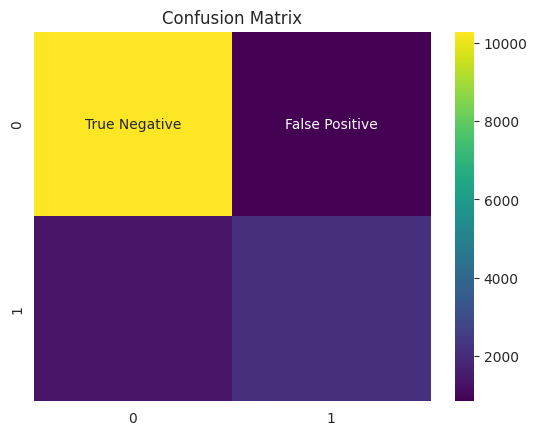

In [55]:
from sklearn.metrics import confusion_matrix

#Defining labels for Confusion Matrix
matrix_labels = ["True Negative", "False Positive", "False Negative", "True Positive"]

labels = np.asarray(matrix_labels).reshape(2, 2)

cm = confusion_matrix(y_test, predicted)

sns.heatmap(cm, annot=labels, fmt='', cmap='viridis')

# Set the title
plt.title('Confusion Matrix')

plt.show()

Im Folgenden werde ich die die Anzahl der Bäume zu einer Liste zusammenfassen. Die Anzahl der Bäume soll von n=1 bis n=500 in 5er Schritten erfolgen. 
Dadurch möchte ich einen ersten Eindruck für das `Overfitting`bekommen. 

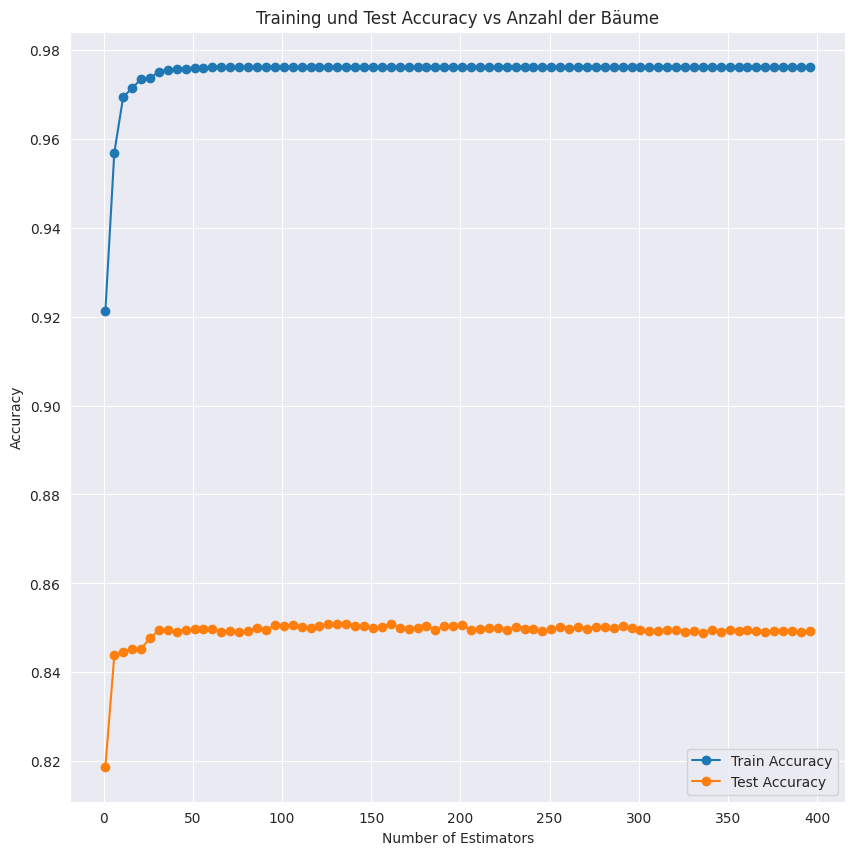

In [56]:
# Extract data from the DataFrame
x = df_accuracies['anzahl.bäume']
y1 = df_accuracies['train.accuracy']
y2 = df_accuracies['test.accuracy']

plt.figure(figsize=(10, 10))
plt.plot(x, y1, marker='o', label='Train Accuracy')
plt.plot(x, y2, marker='o', label='Test Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Training und Test Accuracy vs Anzahl der Bäume')
plt.legend()
plt.grid(True)
plt.show()

Das Diagramm zeigt, dass das Modell nicht so anfällig auf Overfitting ist. Mit viel gutem Willen kann man möglicherweise eine leichte Verschlechterung der Ergebnisse bei hohen Modellkomplexitäten sehen, allerdings ist der Trend nicht sichtbar genug gegenüber den Fluktuationen um eindeutig ein Overfitting auszumachen. Die Fluktuation der Werte kann außer Acht gelassen werden. Bei n=45 Bäumen ist die nötige Modellkomplexität erreicht. 


## 5. Fazit

In den vorherigen Abschnitten wurde beschrieben wurde eine vollständige Datenanaylse in Anlehnung an den [CRISP-DM-Zyklus](https://www.datascience-pm.com/crisp-dm-2/). Die sechste Phase *Deployment* wurde nicht durchgeführt, da dies den Rahmen
dieser Arbeit übersteigen würde. Die einzelnen Phasen des *CRISP-DM-Zyklus* sind nicht immer kongurent mit den Kapitelbezeichnungen dieser Arbeit. Dennoch habe ich mich bei meiner Analyse größtenteils an dieses Vorgehene gehalten. Die Hypothese war, dass 
vorrausgesagt werden sollte, ob eine Person, die in den USA lebt, aufgrund der biografischen Informationen (z.B. Bildungsgrad, Gender, Berufsgruppe, Alter, etc.) ein jährliches Einkommen von über 50K$ erzielt oder nicht.
Die Datenexploration ergab, dass die es einen Daten-Bias besonders in der Kategorie `sex`. Außerdem wurde die ethnische Identität *Hispanic* nicht in dem Datensatz berücksichtig. Der Datensatz lag vollständig vor und hatte keine großen Ausreißer, die bereinigt werden mussten. 
Bei dem Modell habe ich mich für einen `Random Forest`entschieden. Als Performance-Metriken für Klassifizierungsmodelle habe ich mich für `Accuracy` und die `Confusion Matrix`entschieden. Außerdem habe ich mir in dem Modell das mögliche `Overfitting` anhand der Anzahl der Bäume nocheinmal nähers angeschaut. Wie bereits diskutiert, müssen diese Klassifizierungsmodelle sehr genau betrachtet werden, und je nach Modell und Datensatz eine qualifzierende Aussage geben zu können. Mit einer Accuracy der Testdaten von 85.04 ist noch Luft nach oben. Im folgenden und letzen Kapitel lege ich die möglichen Optimierungsschritte noch einmal dar. 


## 6.  Optimierung

Um das Modell noch besser trainieren zu können, hätte ich folgende Ideen für die Optimierung. Aus Zeitgründen kann ich diese hier nur nenne, jedoch nicht praktisch ausführen.

- Standardisierung der Daten: Da teilweise die Daten einen Bias haben, der nicht mit der Bevölkerungsstatistik der USA übereinstimmt, könnten diese Werte durch eine Z-Transformation standardisiert werden. Dies würde ich für die Variable `Geschlecht` machen.
- Datentransformation: Durch die Anwendung des Logarithmus (natürlicher Logarithmus oder Basis 10), insbesondere wenn die Verteilung stark verzerrt ist. Dies könnte die Daten normalisieren und eventuelle Ausreißer reduzieren. 
- Korrelation zwischen nominalskalierten Daten mit dem X^2-Test: Mit ihm können zwei gemessene Variablen auf Unabhängigkeit geprüft werden.
- Synthetische Daten generieren: Mit dem Vefahren SMOTE (Synthetic Minority Over-sampling Technique) von scikit learn könnten Daten, die nicht gebalanced sind (z.B. `Geschlecht`, `Einkommen`) neue Werte generiert werden.
- Bevölkerungsräprentanz: Testen des Modells mit den CPS Daten aus 1994. Da die Daten monatlich erhoben werden, könnte man alle 12 Monate mit dem Modell testen.
- LabelEncoding: Bei dieser Methode werden den kategorialen Werten auf der Grundlage der durchschnittlichen Beziehung mit dem Zielmerkmal zusammengeführt. Dies ist eine einfache und effektive Methode für das Supervised Learning. 
- Optimierung des Modells: Ausgeben der Tiefe der Bäume. Nachdem mir die Anzahl der Bäume ausgeben lassen habe, könnte man nun schauen, ob auch die Anzahl der Tiefe der Bäume einen Einfluss auf das Ergebnis hat und welches die optimale Baumtiefe wäre.
- Da das Modell zeigt, dasas es einen opitmalen Output bei n045 Bäumen hat, könnte man auch einmal das Modell des Desicioin-Trees anwenden 


Zuletzt möchte ich noch hinzufügen, dass meine Lernkurve druch das Modell sehr stark gestiegen ist und es auch sehr viel Spaß gemacht hat. Da ich in meiner bisherigen beruflichen Laufbahn wenige Berührungspunkte mit einer Datenanalyse hatte, war es auch das erste Mal, dass ich ein Modell des maschinellen Lernes benutzt habe. Daher muss ich auch ehrlich hinzufügen, dass ich die Modelle nicht gänzlich in deren Tiefe bis jetzt durchdrungen habe. Rückblickend würde ich einiges anders machen. Z.B. Zusammenführung des Datensatzes, Auswahl des Modells, Berrechnung der Korrelation. 

